In [ ]:
!pip install inference-sdk
!pip install matplotlib
!pip install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.5 MB/s eta 0:00:00


In [ ]:
from inference_sdk import InferenceHTTPClient
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

Inference result: {'time': 0.04925883600026282, 'image': {'width': 1064, 'height': 1200}, 'predictions': [{'x': 503.32031249999994, 'y': 432.421875, 'width': 144.140625, 'height': 292.96875, 'confidence': 0.6475589275360107, 'class': 'maiz', 'class_id': 0, 'detection_id': '3abead51-a568-4cfb-b5a8-422028fe509f'}, {'x': 333.984375, 'y': 991.4062499999999, 'width': 260.15625, 'height': 417.1875, 'confidence': 0.6151506900787354, 'class': 'maiz', 'class_id': 0, 'detection_id': 'bfcc928c-9e51-41d4-8254-2d88d240fd98'}, {'x': 673.828125, 'y': 941.6015624999999, 'width': 217.96875, 'height': 476.95312499999994, 'confidence': 0.5805550813674927, 'class': 'maiz', 'class_id': 0, 'detection_id': '2e189d65-753a-476d-9427-e46bd1e7b3ee'}, {'x': 99.0234375, 'y': 584.1796875, 'width': 99.609375, 'height': 261.328125, 'confidence': 0.5080292224884033, 'class': 'maiz', 'class_id': 0, 'detection_id': 'd4821cc3-7b5e-44fa-ac28-7934b79ea5c7'}, {'x': 100.78125, 'y': 185.7421875, 'width': 175.78125, 'height': 

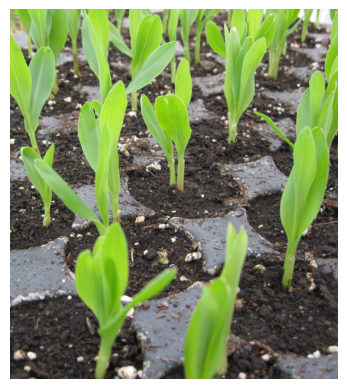

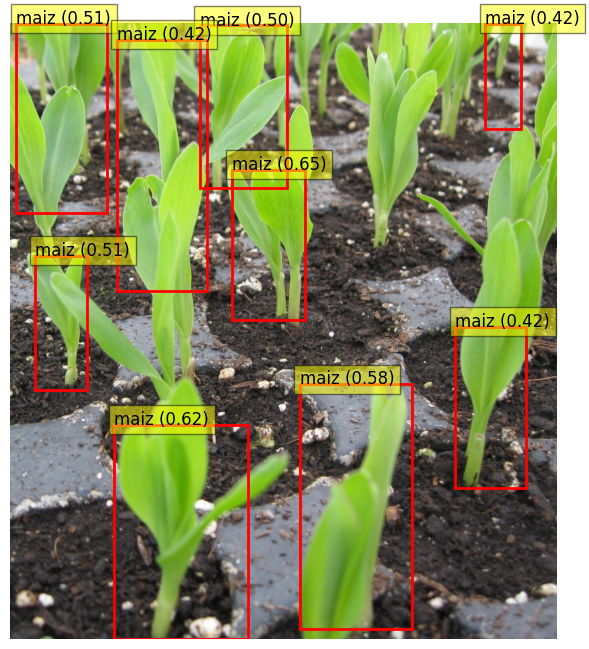

In [ ]:


CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="cSzTYGz5d3iKxkblZ3aj"
)

image_path = "2.jpg"
image = cv2.imread(image_path)
if not os.path.exists(image_path):
    print(f"Error: The file {image_path} does not exist.")

# Save the image to disk (necessary for inference_sdk)
cv2.imwrite("uploaded.jpg", image)

# Perform inference using Roboflow API for corn and weed detection
result = CLIENT.infer("uploaded.jpg", model_id="maiz-trg24/1")  # Replace with your dataset ID

# Print the result to inspect the structure
print("Inference result:", result)

# Check if 'predictions' key exists in the result
if 'predictions' not in result:
    print("No predictions found in the result")
else:
    predictions = result['predictions']

    # Display the original image
    image = Image.open("uploaded.jpg")
    plt.imshow(image)
    plt.axis('off')

    # Create a new figure for the results
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Draw the image
    ax.imshow(image)
    ax.axis('off')

    # Draw bounding boxes and labels
    for pred in predictions:
        print("Prediction:", pred)  # Print each prediction to inspect
        # Adjust the following lines based on the actual structure
        if 'x' in pred and 'y' in pred and 'width' in pred and 'height' in pred:
            # Use the direct keys for bbox
            x = pred['x']
            y = pred['y']
            width = pred['width']
            height = pred['height']
            confidence = pred['confidence']
            label = pred['class']

            # Calculate the rectangle's coordinates
            x1 = int(x - width / 2)
            y1 = int(y - height / 2)
            x2 = int(x + width / 2)
            y2 = int(y + height / 2)

            # Draw the rectangle
            rect = plt.Rectangle((x1, y1), width, height, fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

            # Draw the label
            ax.text(x1, y1, f'{label} ({confidence:.2f})', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

    # Show the result
    plt.show()